<h1>PROYEK ANALISIS DATA</h1>
<h3>Nama : Muhammad Anas Abbas</h3>
<h3>Email : manasabbas18@gmail.com</h3>
<h3>id Dicoding : anasvbbas</h3>

<h2>Pertanyaan Bisnis<h2>
<h5>1. Bagaimana performa penyewaan sepeda beberapa bulan terakhir?</h5>
<h5>2. Bagaimana performa penyewaan sepeda di setiap musim sepanjang tahun?</h5>
<h5>3. Pada kondisi cuaca seperti apa penyewa paling banyak menyewa sepeda?</h5>
<h5>4. Bagaimana perbedaan performa penyewaan sepeda di hari libur dan hari kerja</h5>
<h5>5. Bagaimana performa penyewaan sepeda di tiap jam setiap harinya?</h5>

<h2>Wragling Data</h2>

<h5>Import Library dan gathering data</h5>

In [98]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

day_df = pd.read_csv('day.csv')
hour_df = pd.read_csv('hour.csv')
day_df.head()
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


<h5>Assesing data</h5>

In [99]:
hour_df.info()
day_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [100]:
day_df.isna().sum()
hour_df.isna().sum()
day_df.duplicated().sum()
hour_df.duplicated().sum()


0

<p>setelah dilakukan pengecekan data kosong dan data duplikat ternyata tidak ada data kosong dan duplikat di kedua dataframe dan data sudah bersih<p>

In [101]:
day_df.describe()
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [102]:
day_df['total_rent'] = day_df['casual'] + day_df['registered']
day_df.groupby(by="dteday")["total_rent"].sum()

dteday
2011-01-01     985
2011-01-02     801
2011-01-03    1349
2011-01-04    1562
2011-01-05    1600
              ... 
2012-12-27    2114
2012-12-28    3095
2012-12-29    1341
2012-12-30    1796
2012-12-31    2729
Name: total_rent, Length: 731, dtype: int64

<h2>Exploratory Data Analysis</h2>
<h5>Explore</h5>

In [103]:
day_df["weathersit"] = day_df.weathersit.apply(
    lambda x: "Cerah"
    if x == 1
    else ("Kabut" if x == 2 else ("Hujan" if x == 3 else ("Badai" if x == 4 else "Tidak diketahui")))
)
day_df.groupby(by="weathersit")["total_rent"].sum()

weathersit
Cerah    2257952
Hujan      37869
Kabut     996858
Name: total_rent, dtype: int64

In [104]:
day_df["season"] = day_df.season.apply(
    lambda x: "Musim semi"
    if x == 1
    else ("Musim Panas" if x == 2 else ("Musim gugur" if x == 3 else ("Musim Dingin" if x == 4 else "Tidak diketahui")))
)
day_df.groupby(by="season")["total_rent"].sum()

season
Musim Dingin     841613
Musim Panas      918589
Musim gugur     1061129
Musim semi       471348
Name: total_rent, dtype: int64

In [105]:
day_df["temp"] = day_df["temp"]*41
day_df["temp"] = day_df.temp.apply(
    lambda x: "dingin" if x <= 15 else "Hangat"
    if x < 25 else "Panas" if x < 41 else "Extreme"
)

day_df.groupby(by="temp")["total_rent"].sum()

temp
Hangat    1303539
Panas     1362977
dingin     626163
Name: total_rent, dtype: int64

In [106]:
day_df["workingday"] = day_df.workingday.apply(
    lambda x: "Work"
    if x == 1
    else "Holiday"
)
day_df.groupby(by="workingday")["total_rent"].sum()

workingday
Holiday    1000269
Work       2292410
Name: total_rent, dtype: int64

In [107]:
hour_df['total_rent'] = hour_df['casual'] + hour_df['registered']
hour_df.groupby(by="hr")["total_rent"].sum()

hr
0      39130
1      24164
2      16352
3       8174
4       4428
5      14261
6      55132
7     154171
8     261001
9     159438
10    126257
11    151320
12    184414
13    184919
14    175652
15    183149
16    227748
17    336860
18    309772
19    226789
20    164550
21    125445
22     95612
23     63941
Name: total_rent, dtype: int64

In [108]:
day_df.groupby(by="dteday").agg({
    "casual": "sum",
    "registered": "sum",
})

,casual,registered
dteday,,
2011-01-01,331,654
2011-01-02,131,670
2011-01-03,120,1229
2011-01-04,108,1454
2011-01-05,82,1518
...,...,...
2012-12-27,247,1867
2012-12-28,644,2451
2012-12-29,159,1182


In [109]:
all_df = pd.merge(
    left=day_df,
    right=hour_df,
    how="outer",
    left_on="dteday",
    right_on="dteday"
)
all_df.sample()

,instant_x,dteday,season_x,yr_x,mnth_x,holiday_x,weekday_x,workingday_x,weathersit_x,temp_x,...,workingday_y,weathersit_y,temp_y,atemp_y,hum_y,windspeed_y,casual_y,registered_y,cnt_y,total_rent_y
5164,220,2011-08-08,Musim gugur,0,8,0,1,Work,Cerah,Panas,...,1,1,0.66,0.5909,0.89,0.0,4,3,7,7


<h2>Visualization & Explanatory Analysis</h2>

<h5>1. Bagaimana performa penyewaan sepeda beberapa bulan terakhir?</h5>


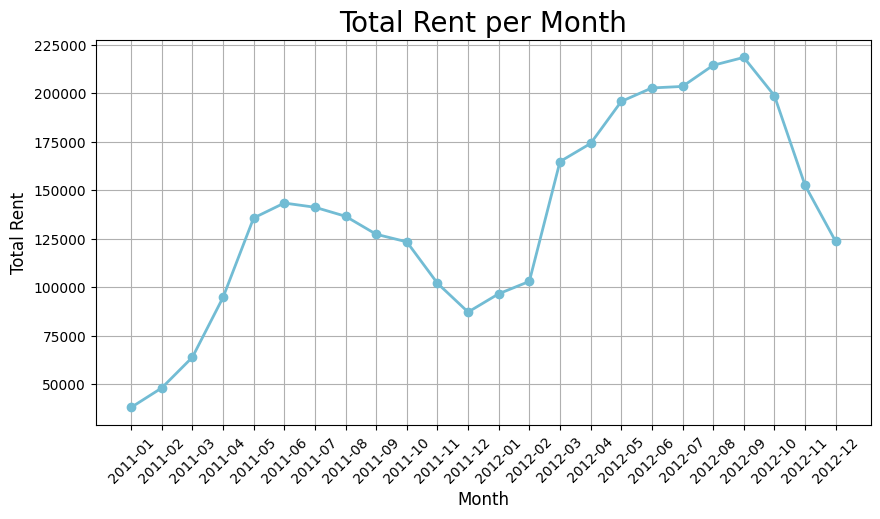

In [110]:
import pandas as pd
import matplotlib.pyplot as plt

day_df['dteday'] = pd.to_datetime(day_df['dteday'])

day_df['month_year'] = day_df['dteday'].dt.to_period('M')

monthly_rent = day_df.groupby('month_year')['total_rent'].sum().reset_index()

monthly_rent['month_year'] = monthly_rent['month_year'].astype(str)

plt.figure(figsize=(10, 5))
plt.plot(
    monthly_rent["month_year"],
    monthly_rent["total_rent"],
    marker='o', 
    linewidth=2,
    color="#72BCD4"
)
plt.title("Total Rent per Month", loc="center", fontsize=20)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Total Rent", fontsize=12)
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.grid(True)
plt.show()


<h5>2. Bagaimana performa penyewaan sepeda di setiap musim sepanjang tahun?</h5>

C:\Users\manas\AppData\Local\Temp\ipykernel_18980\3374032890.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


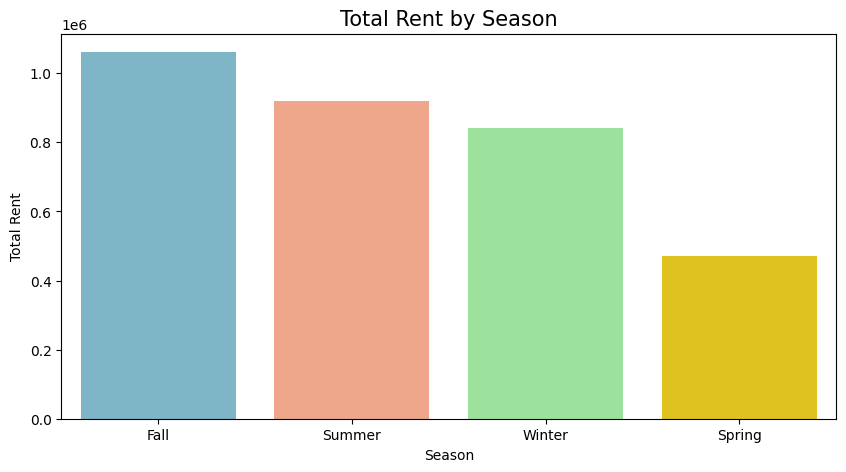

In [111]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Misalkan Anda memiliki DataFrame 'day_df' dengan kolom 'season' yang sudah diubah ke musim

day_df["season"] = day_df.season.apply(
    lambda x: "Spring" if x == "Musim semi" else ("Summer" if x == "Musim Panas" else ("Fall" if x == "Musim gugur" else ("Winter" if x == "Musim Dingin" else "Unknown")))
)

# Kelompokkan data berdasarkan musim dan hitung total sewa
season = day_df.groupby(by="season")["total_rent"].sum().reset_index()

# Plot bar chart jumlah pelanggan berdasarkan musim
plt.figure(figsize=(10, 5))
colors = ['#72BCD4', '#FFA07A', '#90EE90', '#FFD700']  # Atur warna untuk setiap musim
sns.barplot(
    x="season",
    y="total_rent",
    data=season.sort_values(by="total_rent", ascending=False),
    palette=colors
)
min_rent = day_df['total_rent'].min()
max_rent = day_df['total_rent'].max()

day_df['total_rent'] = day_df['total_rent'] * (max_rent - min_rent) + min_rent
plt.title("Total Rent by Season", loc="center", fontsize=15)
plt.xlabel("Season")
plt.ylabel("Total Rent")
plt.show()




<h5>3. Pada kondisi cuaca seperti apa penyewa paling banyak menyewa sepeda?</h5>

C:\Users\manas\AppData\Local\Temp\ipykernel_18980\3590886154.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\manas\AppData\Local\Temp\ipykernel_18980\3590886154.py:15: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  sns.barplot(


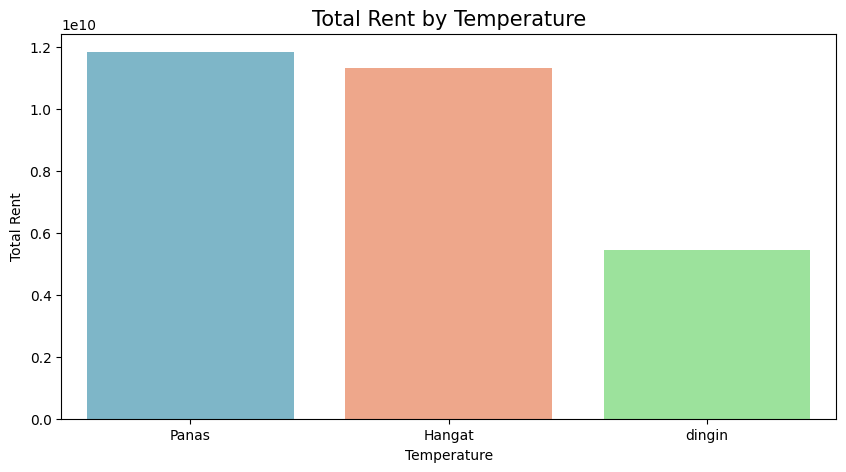

In [112]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

day_df["temp"] = day_df.temp.apply(
    lambda x: "dingin" if x == "dingin" else "Hangat"
    if x == "Hangat" else "Panas" if x == "Panas" else "Extreme"
)

temp = day_df.groupby(by="temp")["total_rent"].sum().reset_index()

# Plot bar chart jumlah pelanggan berdasarkan suhu
plt.figure(figsize=(10, 5))
colors = ['#72BCD4', '#FFA07A', '#90EE90', '#FFD700']  # Atur warna untuk setiap musim
sns.barplot(
    x="temp",
    y="total_rent",
    data=temp.sort_values(by="total_rent", ascending=False),
    palette=colors
)
min_rent = day_df['total_rent'].min()
max_rent = day_df['total_rent'].max()

day_df['total_rent'] = day_df['total_rent'] * (max_rent - min_rent) + min_rent
plt.title("Total Rent by Temperature", loc="center", fontsize=15)
plt.xlabel("Temperature")
plt.ylabel("Total Rent")
plt.show()

<h5>4. Bagaimana perbedaan performa penyewaan sepeda di hari libur dan hari kerja</h5>

C:\Users\manas\AppData\Local\Temp\ipykernel_18980\1808975566.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\manas\AppData\Local\Temp\ipykernel_18980\1808975566.py:15: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.barplot(


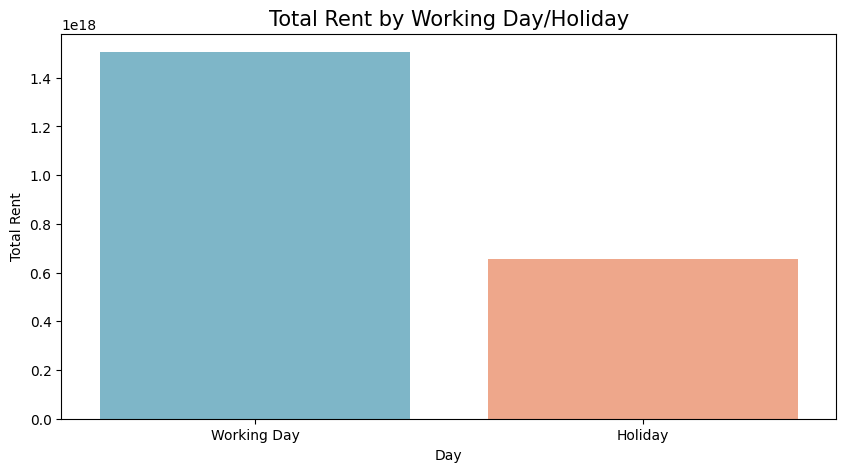

In [113]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

day_df["workingday"] = day_df.workingday.apply(
    lambda x: "Working Day" if x == "Work" else ("Holiday" if x == "Holiday" else "Unidentified")
)


workingday = day_df.groupby(by="workingday")["total_rent"].sum().reset_index()

# Plot bar chart jumlah pelanggan berdasarkan suhu
plt.figure(figsize=(10, 5))
colors = ['#72BCD4', '#FFA07A', '#90EE90', '#FFD700']  # Atur warna untuk setiap musim
sns.barplot(
    x="workingday",
    y="total_rent",
    data=workingday.sort_values(by="total_rent", ascending=False),
    palette=colors
)
plt.title("Total Rent by Working Day/Holiday", loc="center", fontsize=15)
plt.xlabel("Day")
plt.ylabel("Total Rent")
plt.show()

<h5>5. Bagaimana performa penyewaan sepeda di tiap jam setiap harinya?</h5>

C:\Users\manas\AppData\Local\Temp\ipykernel_18980\508515017.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="hr", y="total_rent", data=hour_df, palette='tab10')


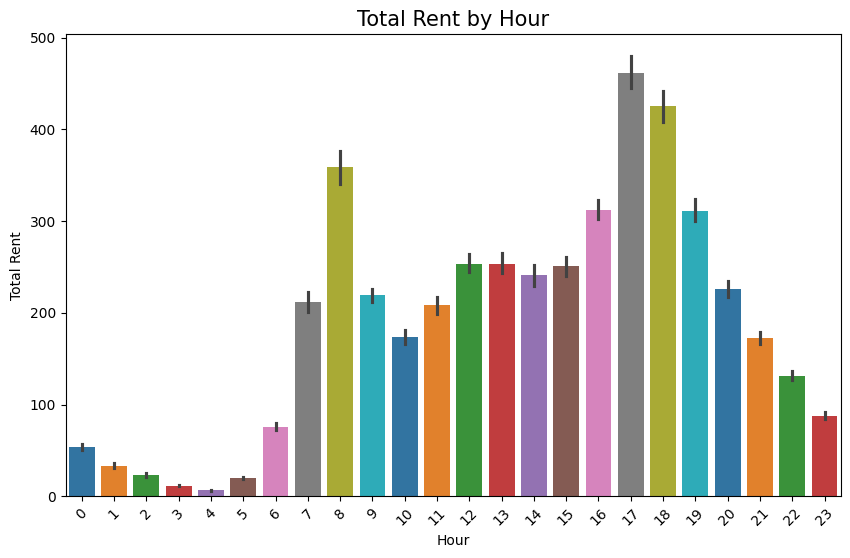

In [114]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Misalkan Anda memiliki DataFrame 'hour_df' dengan informasi sewa sepeda per jam

# Visualisasi jumlah sewa sepeda per jam
plt.figure(figsize=(10, 6))

sns.barplot(x="hr", y="total_rent", data=hour_df, palette='tab10')
plt.ylabel("Total Rent")
plt.xlabel("Hour")
plt.title("Total Rent by Hour", loc="center", fontsize=15)
plt.xticks(rotation=45)  # Memutar label sumbu x untuk memudahkan pembacaan jam

plt.show()

<h2>Conclusion</h2>

<h3>Pertanyaan 1</h3>
<p>Grafik penyewaan menunjukkan kenaikan yang baik di tiap pertengahan hingga menuju akhir tahun, dan peningkatan signifikan dapat dilihat dari penyewaan 2011 dan 2012</P>

<h3>Pertanyaan 2</h3>
<p>dapat dilihat bahwa penyewaan paling tinggi dilakukan pada musim gugur karena cuaca yang mendukung untuk melakukan aktivitas diluar ruangan, diikuti musing panas di peringkat kedua, musim dingin di peringkat ketiga dan musim semi di peringkat terakhir, mungkin penggunaan human resource pada musim semi dapat dikurangi karena pendapatan di musim itu juga akan berkurang</P>

<h3>Pertanyaan 3</h3>
<p>Berdasarkan suhu yang telah diklasifikasikan sebelumnya menunjukkan bahwa penyewaan paling banyak dilakukan pada hari yang panas dan paling sedikit dilakukan pada hari yang dingin seperti musim dingin dan musim semi</P>

<h3>Pertanyaan 4</h3>
<p>Perbedaan penyewaan sepeda pada hari libu dan hari kerja bisa dikatakan seimbang karena hari kerja ada 5 hari sedangkan hari libur hanya 2 hari, penyewaan sepeda tetap harus dijalankan walaupun di hari libur karena akan ada banyak penyewa di hari libur</P>

<h3>Pertanyaan 5</h3>
<p>Berdasarkan grafik dapat disimpulkan bahwa penyewaan sepeda paling banyak dilakukan pada pagi hari dan sore hari, selain itu penyewaan sepeda akan mengalami penurunan tingkat penyewa, dapat disimpulkan bahwa penggunaan sepeda sewaan ini dilakukan untuk berolahraga pagi dan sore hari</P>